# Predict CTR of an Email Campaign

## Analytics Vidhya Job-a-thon August 2022



#### Problem Statement

Most organizations today rely on email campaigns for effective communication with users. Email communication is one of the popular ways to pitch products to users and build trustworthy relationships with them.

Email campaigns contain different types of CTA (Call To Action). The ultimate goal of email campaigns is to maximize the Click Through Rate (CTR).

CTR is a measure of success for email campaigns. The higher the click rate, the better your email marketing campaign is. CTR is calculated by the no. of users who clicked on at least one of the CTA divided by the total no. of users the email was delivered to.

CTR =   No. of users who clicked on at least one of the CTA / No. of emails delivered
CTR depends on multiple factors like design, content, personalization, etc. 


How do you design the email content effectively?
What should your subject line look like?
What should be the length of the email?
Do you need images in your email template?

As a part of the Data Science team, in this hackathon, you will build a smart system to predict the CTR for email campaigns and therefore identify the critical factors that will help the marketing team to maximize the CTR.


#### Objective

Your task at hand is to build a machine learning-based approach to predict the CTR of an email campaign.



- Let's begin by importing the necessary libraries first

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

- Loading the training dataset and performing data investigations like head, shape, data types etc

In [2]:
df = pd.read_csv('train_F3fUq2S.csv')
df.head()

,campaign_id,sender,subject_len,body_len,mean_paragraph_len,day_of_week,is_weekend,times_of_day,category,product,...,is_image,is_personalised,is_quote,is_timer,is_emoticons,is_discount,is_price,is_urgency,target_audience,click_rate
0,1,3,76,10439,39,5,1,Noon,6,26,...,0,0,0,0,0,0,0,0,14,0.103079
1,2,3,54,2570,256,5,1,Morning,2,11,...,0,0,0,0,0,0,0,0,10,0.700000
2,3,3,59,12801,16,5,1,Noon,2,11,...,1,0,1,0,0,0,0,0,16,0.002769
3,4,3,74,11037,30,4,0,Evening,15,9,...,0,0,0,0,0,0,0,0,10,0.010868
4,5,3,80,10011,27,5,1,Noon,6,26,...,0,0,1,0,0,0,0,0,14,0.142826


In [46]:
print('No. of observations: ', df.shape[0])
print('No. of features: ', df.shape[1])

No. of observations:  1888
No. of features:  22


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1888 entries, 0 to 1887
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         1888 non-null   int64  
 1   sender              1888 non-null   int64  
 2   subject_len         1888 non-null   int64  
 3   body_len            1888 non-null   int64  
 4   mean_paragraph_len  1888 non-null   int64  
 5   day_of_week         1888 non-null   int64  
 6   is_weekend          1888 non-null   int64  
 7   times_of_day        1888 non-null   object 
 8   category            1888 non-null   int64  
 9   product             1888 non-null   int64  
 10  no_of_CTA           1888 non-null   int64  
 11  mean_CTA_len        1888 non-null   int64  
 12  is_image            1888 non-null   int64  
 13  is_personalised     1888 non-null   int64  
 14  is_quote            1888 non-null   int64  
 15  is_timer            1888 non-null   int64  
 16  is_emo

## Hypothesis Creation

#### Product Level
1. Price - Not mentioning the price of a product in the email prompts user to check the price and should lead to higher CTR
2. Discount - Presence of discount attracts the user and should lead to higher CTR.
3. Category - Some product category may have higher CTR depending upon their relative utility

#### Email Level
1. Subject - Shorter subject line should have higher CTR as user may not want to read a longer subject mail.
2. Body - Shorter body content will enable user to navigate through email easily and should have higher CTR.
3. Images - Presence of images make emails visually appealing and should lead to higher CTR.
4. No of CTA - Higher the number of CTR, higher should be the CTR but too many CTA may be counterproductive.
5. Urgency - Creating urgency should lead to higher CTR.
6. Emoticons - Presence of emoticons is visually appealing and should lead to higher CTR.
7. Price - Not mentioning the price of a product in the email prompts user to check the price and should laed to  higher CTR
8. Personalisation - Emails personalised to the recipient creates an impression in the mind of user and may lead to higher CTR.

#### Sender Level
1. Type of sender - Some sender should have higher CTR than others.
2. Day of sending - Day of sending the email should affect the response of users. 
3. Weekend - users may navigate through their inboxes on weekends and thus, sending emails on weekends should lead to higher CTR.
4. Time of day - Time of day at which email is sent may have a relationship with CTR.

#### Audience Level
1. Type of audience - The type of audience a particular email is directed to should lead to higher CTR.


In [6]:
#Univariate analysis

df.nunique()

campaign_id           1888
sender                  12
subject_len            170
body_len              1568
mean_paragraph_len     121
day_of_week              7
is_weekend               2
times_of_day             3
category                16
product                 43
no_of_CTA               40
mean_CTA_len            79
is_image                 6
is_personalised          2
is_quote                 7
is_timer                 1
is_emoticons             6
is_discount              2
is_price                 8
is_urgency               2
target_audience         17
click_rate            1810
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

First, we will check the distribution of each features in the dataset. Then, we will check their relationship with the target variable (click_rate) in bivariate analysis

### Numerical features 



array([[<AxesSubplot:title={'center':'subject_len'}>,
        <AxesSubplot:title={'center':'body_len'}>],
       [<AxesSubplot:title={'center':'mean_paragraph_len'}>,
        <AxesSubplot:title={'center':'no_of_CTA'}>],
       [<AxesSubplot:title={'center':'mean_CTA_len'}>, <AxesSubplot:>]],
      dtype=object)

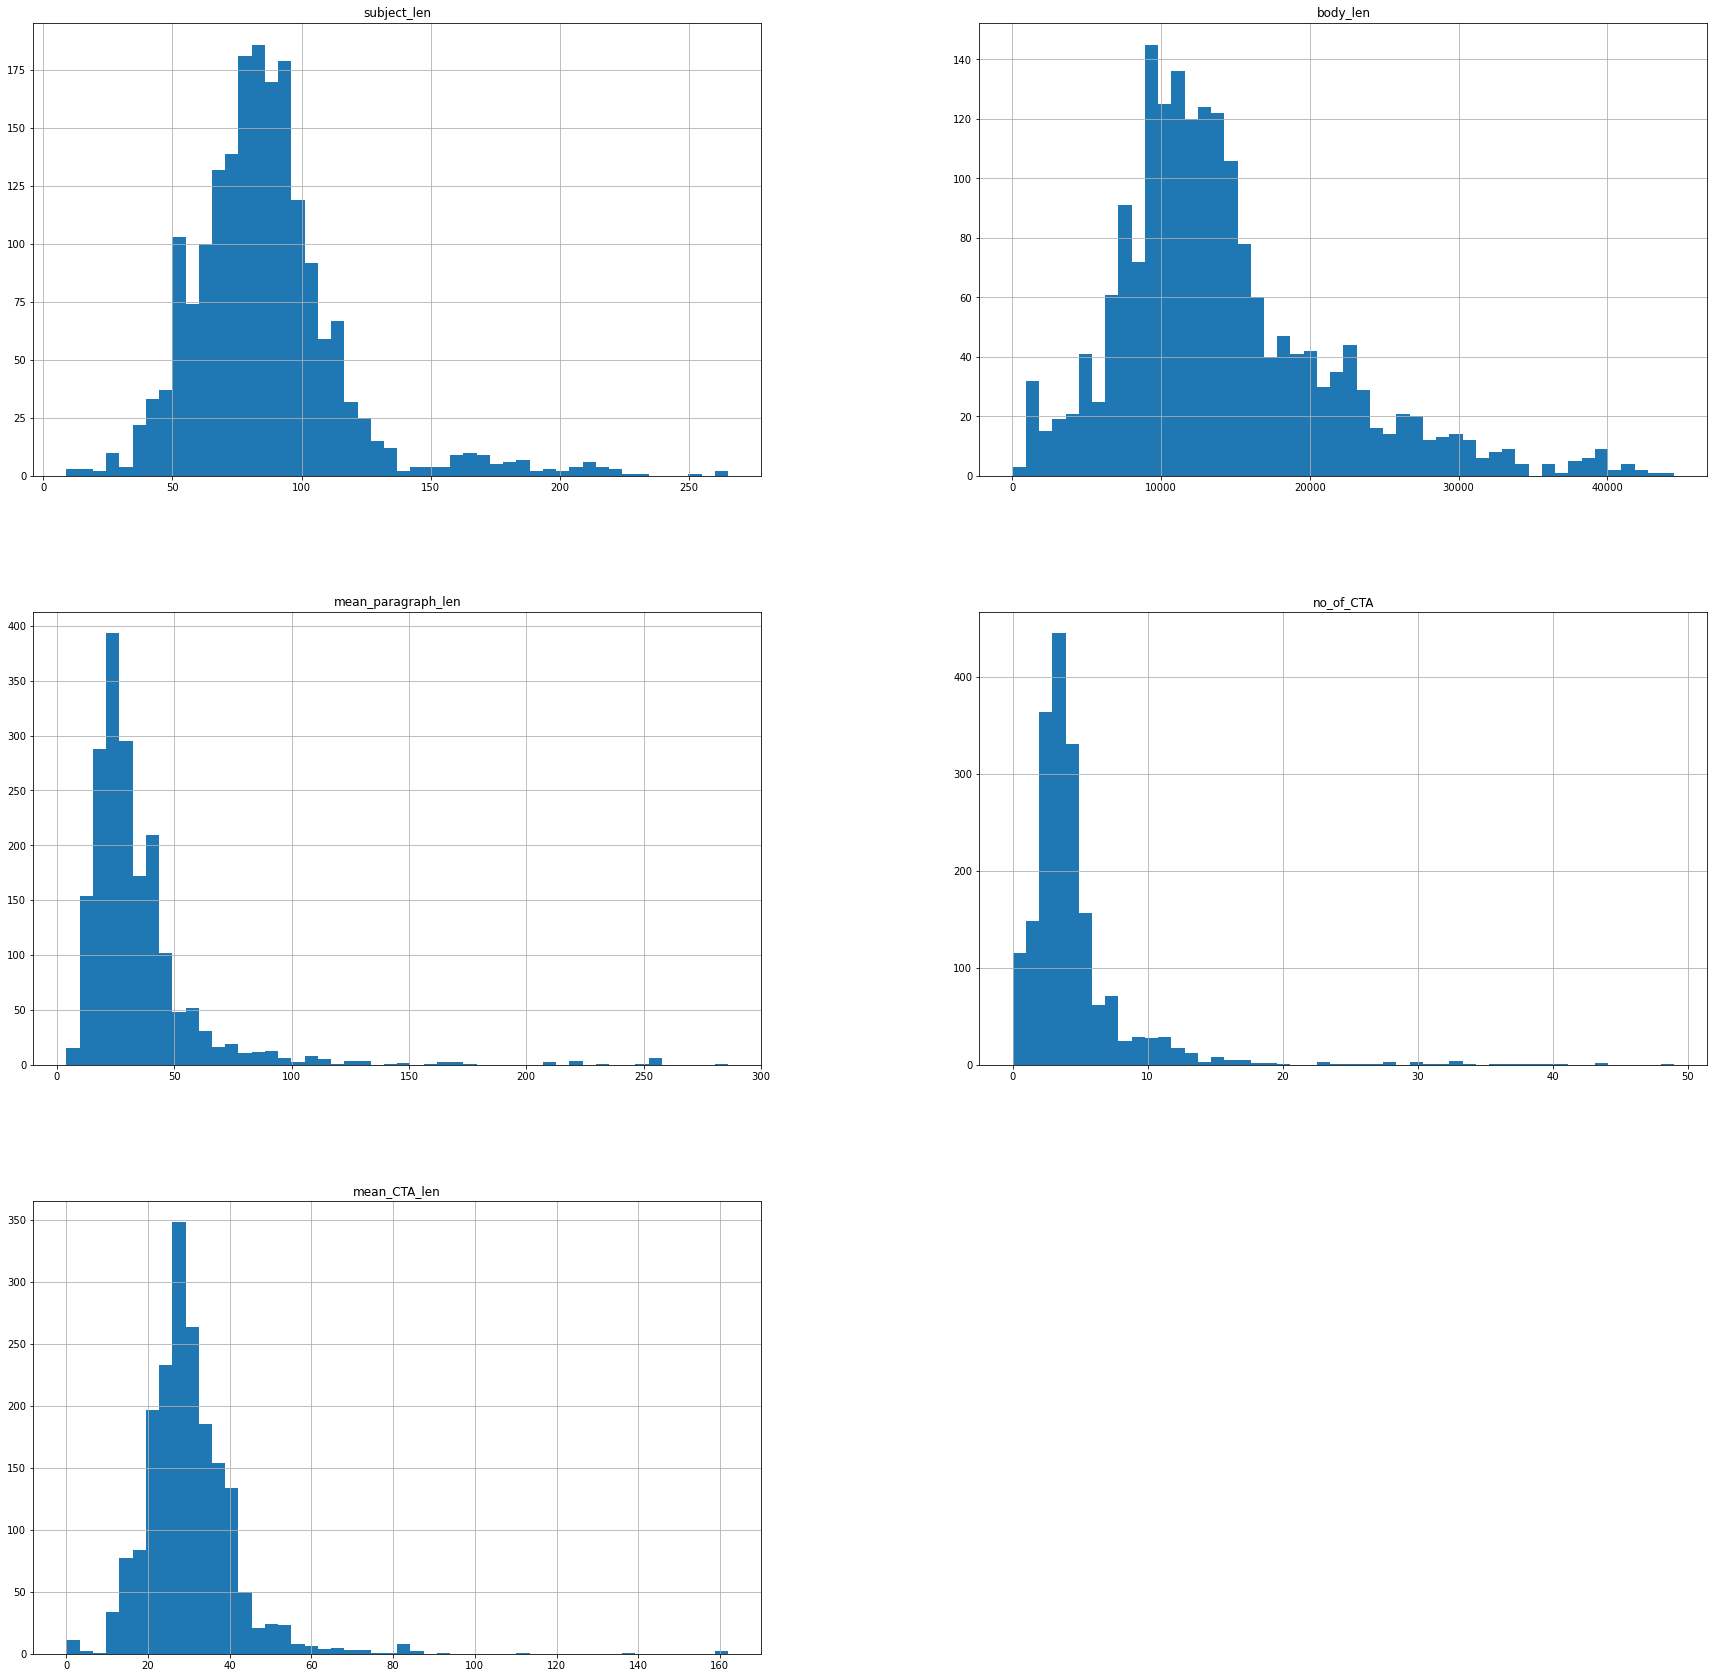

In [7]:
numerical_features = ['subject_len','body_len','mean_paragraph_len','no_of_CTA','mean_CTA_len']

df[numerical_features].hist(bins=50, figsize=(30,30))    

#### Points to note:

- subject_len and body_len are unimodal distributions with approximate normal distribution
- mean_paragraph_len, no_of_CTA, mean_CTA_len are highly right-skewed distributions
- mean_paragraph_len/no_of_CTA/mean_CTA_len can be log-transformed to make it normally distributed


### Categorical Features

- We will take the help oh count plots

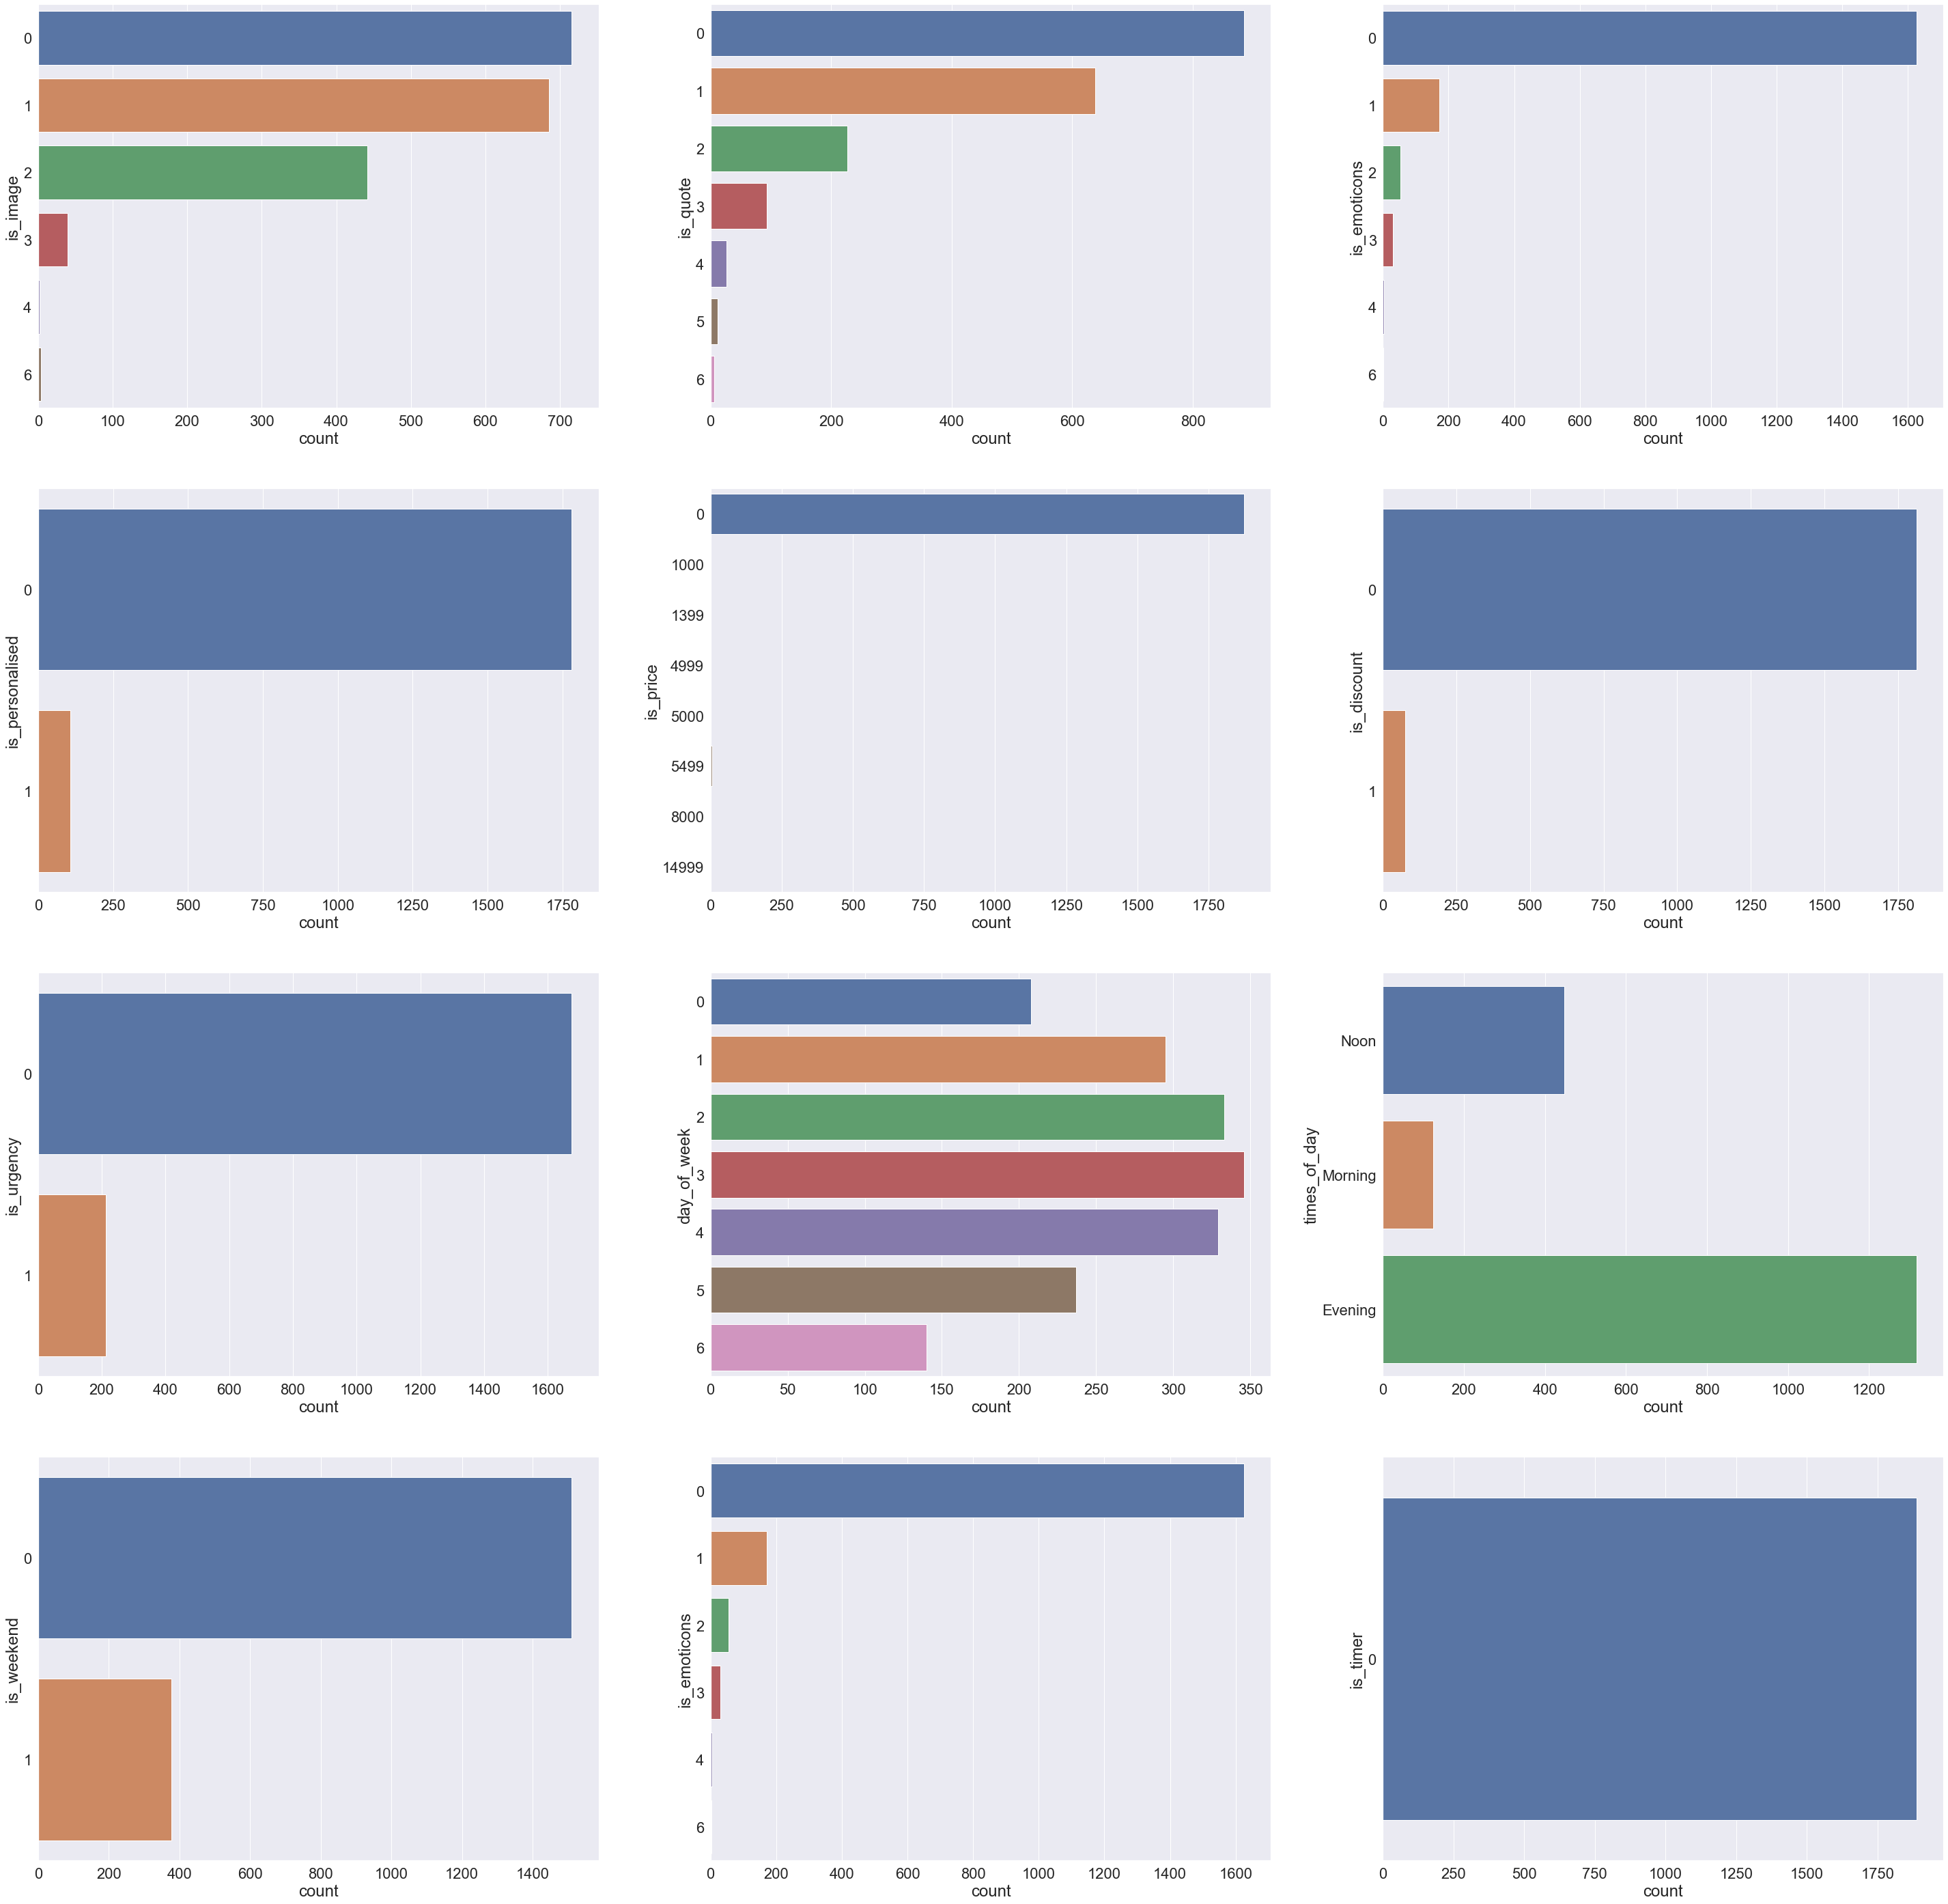

In [8]:
categorical_features = ['is_image','is_quote','is_emoticons','is_personalised','is_price','is_discount',
                        'is_urgency','day_of_week','times_of_day','is_weekend','is_emoticons','is_timer']

sns.set(font_scale=2)
fig = plt.figure(figsize=(50,50))
for i in range(1, len(categorical_features)+1):
    ax = fig.add_subplot(4, 3, i)
    sns.countplot(y=categorical_features[i-1], data=df)

#### Points to note:

- is_image - ranges from 0 to 6, significant number of 1's and 2's and few number of 3 and more images
- is_quote - ranges from 0 to 6, with 0 being the most frequent with decreasing count.
- is_emoticons - hugely dominated by 0's. Very few 1,2, and so on.
- is_personalised/is_discount/is_urgency/is_weekend/ - highly imbalances classes
- is_price - It is supposed to be a boolean flag of 1 and 0 but here, multiple high values are there along with 0's. It seems that the price is written instead of 1(flag). Need to rectify this.
- is_timer - contains only 1 variable. Can be removed.
- times_of_day - Highly imbalanced class with evening as the most dominating data point


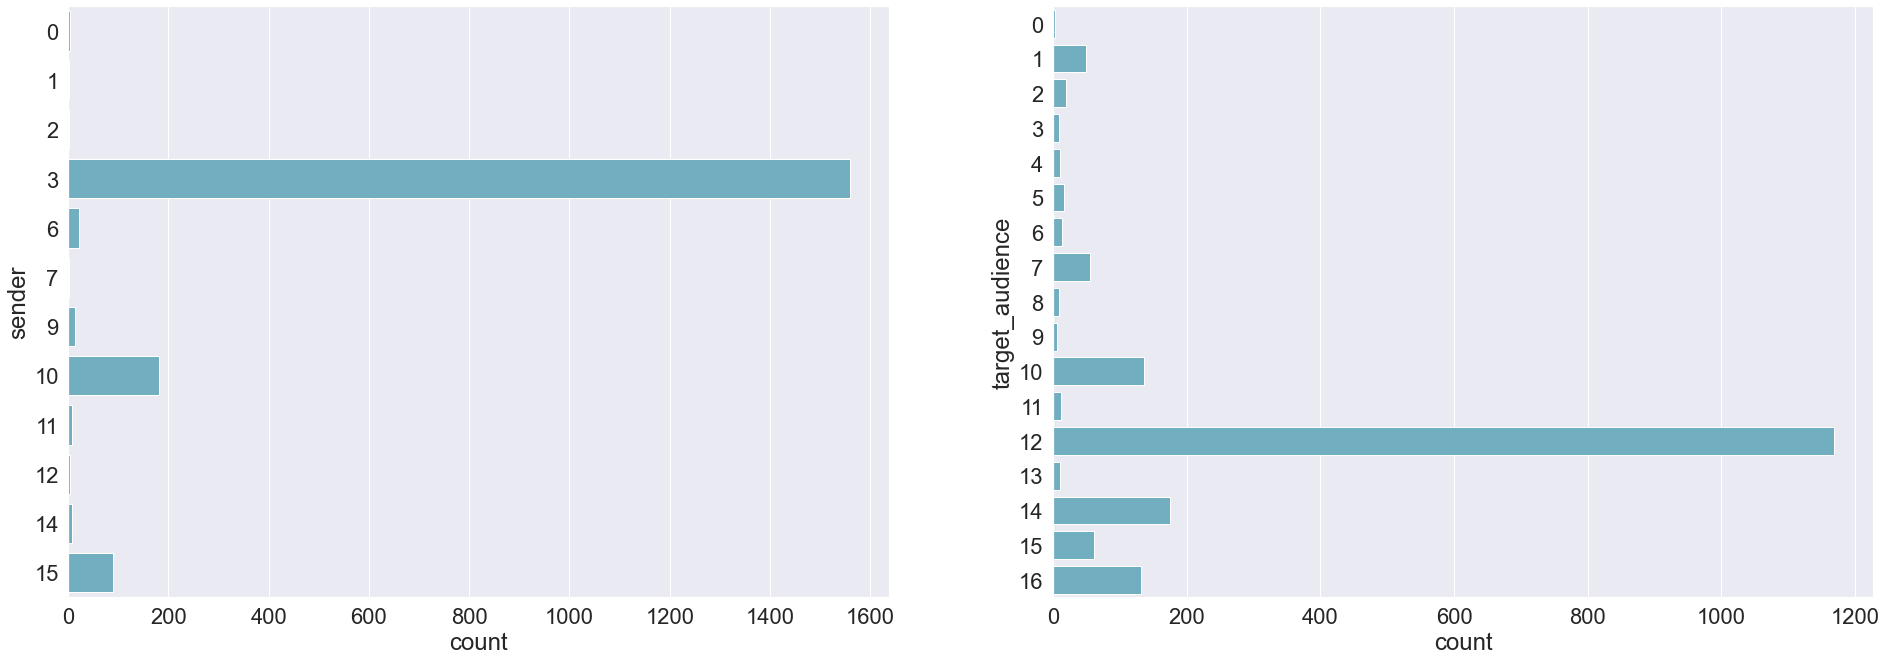

In [9]:
categorical_features2 = ['sender','target_audience']

sns.set(font_scale=2)
fig = plt.figure(figsize=(50,50))
for i in range(1, len(categorical_features2)+1):
    ax = fig.add_subplot(4, 3, i)
    sns.countplot(y=categorical_features2[i-1], data=df, color="c")

In [10]:
pd.pivot_table(df, index=['sender'], columns=['target_audience'], values='click_rate',aggfunc=np.sum,margins=True)

target_audience,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,All
sender,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028154,NaN,0.028154
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002660,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002660
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.070796,NaN,NaN,NaN,NaN,0.070796
3,0.027736,0.764025,0.244092,0.330248,0.152341,0.221038,0.536871,0.344556,0.061671,0.031907,5.339099,0.054016,41.346615,0.192837,15.679971,0.292121,0.887585,66.506729
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.251978,NaN,NaN,NaN,NaN,0.251978
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.510425,NaN,NaN,NaN,NaN,1.510425
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.162497,NaN,NaN,NaN,NaN,0.162497
10,NaN,0.017967,0.278580,0.025434,NaN,NaN,0.125819,0.354165,NaN,NaN,0.043225,NaN,6.647582,NaN,0.351840,0.011273,0.008610,7.864495
11,NaN,0.018767,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.008472,0.031532,NaN,0.081004,NaN,NaN,NaN,0.020846,0.160621


#### Note

- All senders are not sending the mails to all the target audiences. 
- Sender 0,1,2,6,7,9,14 and 13 are sending to only one target audience separately.
- Sender 3 is sending to all the target audiences category.
- Sender 15,12,11 and 10 are sending to multiple audience category



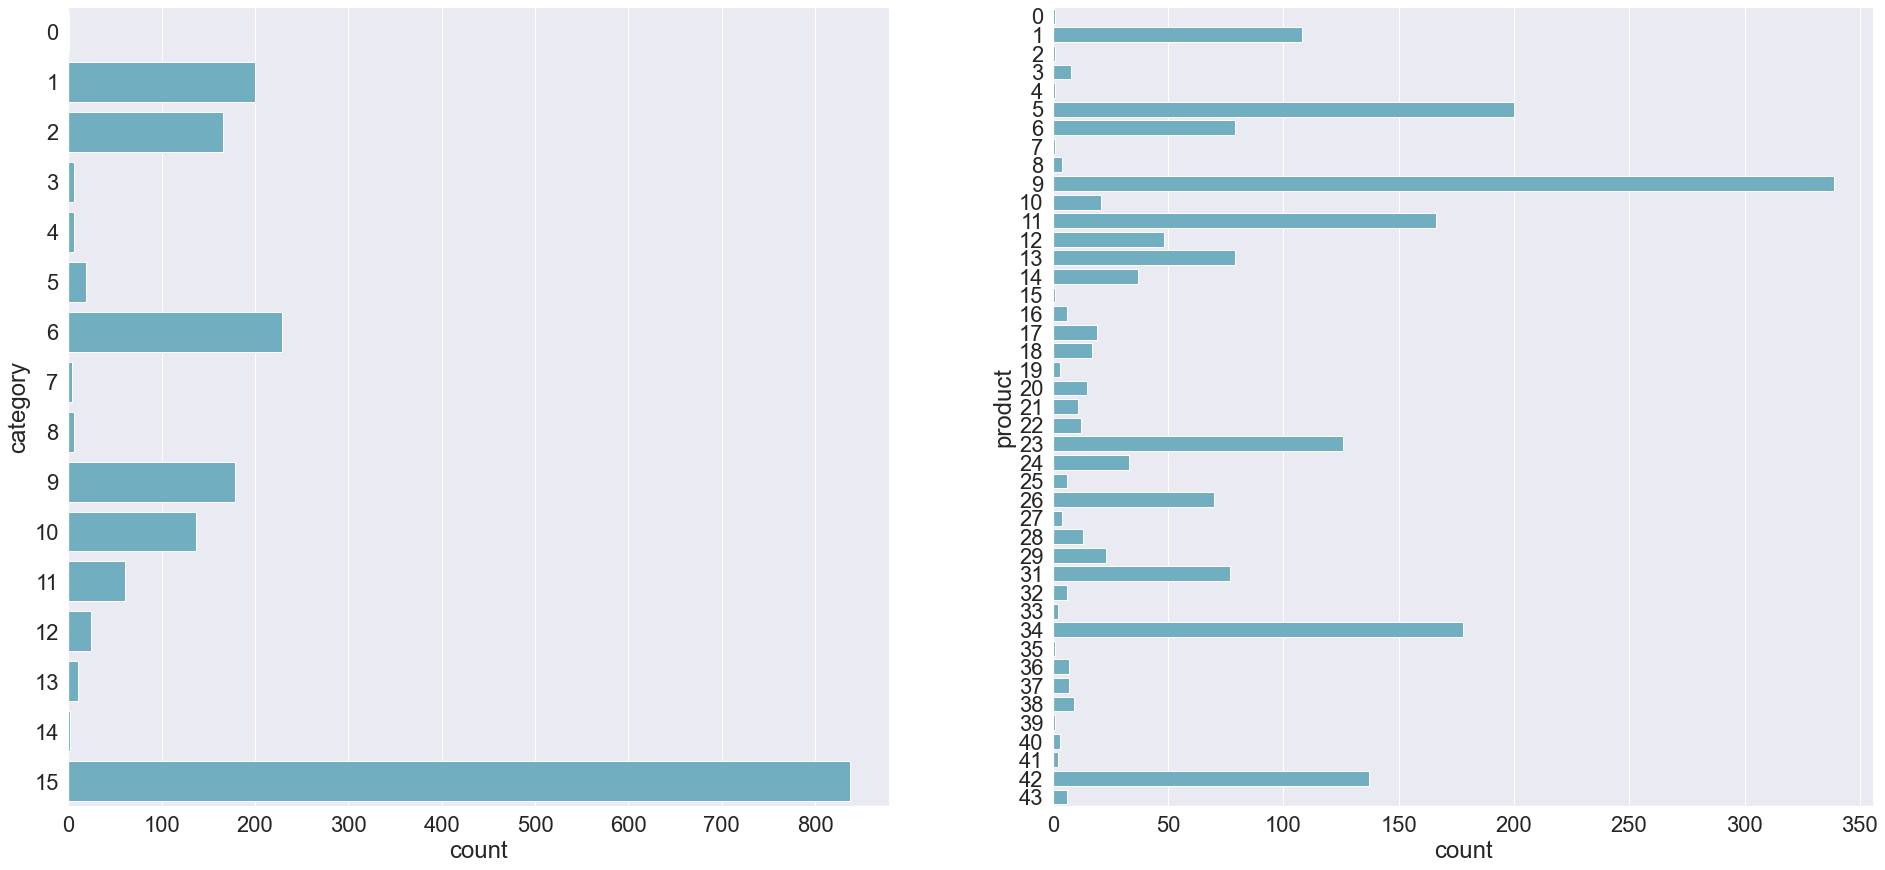

In [11]:
categorical_features3 = ['category','product']

sns.set(font_scale=2)
fig = plt.figure(figsize=(50,50))
for i in range(1, len(categorical_features3)+1):
    ax = fig.add_subplot(3, 3, i)
    sns.countplot(y=categorical_features3[i-1], data=df, color="c")

In [12]:
pd.pivot_table(df, index=['product'], columns=['category'], values='click_rate',aggfunc=np.sum,margins=True)

category,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,All
product,,,,,,,,,,,,,,,,,
0,0.006441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.006441
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.056015,2.056015
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.005209,0.005209
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.744582,0.744582
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004088,0.004088
5,NaN,7.880582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.880582
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.040849,1.040849
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.013309,0.013309
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.078511,0.078511


#### Observations

- Here, we can see that for each category, we have 1 product belonging to only 1 product category. So, we can drop one of the variable. 
- If not dropped, these two can be combined to reduce the categorical features
- Category 1,2,6,9,10,15 have more than 100 counts of emails campaign and significant click rates.

### Bi variate analysis

In [ ]:
#Box plots for categorical variables
# Scatter plots for numerical variables

<AxesSubplot:xlabel='subject_len', ylabel='click_rate'>

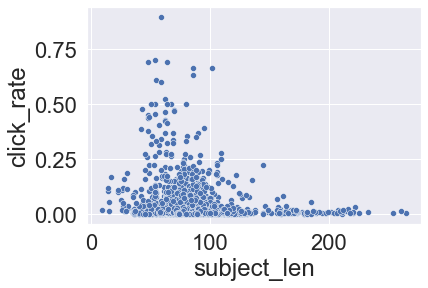

In [48]:
sns.scatterplot(data=df, x='subject_len', y='click_rate')

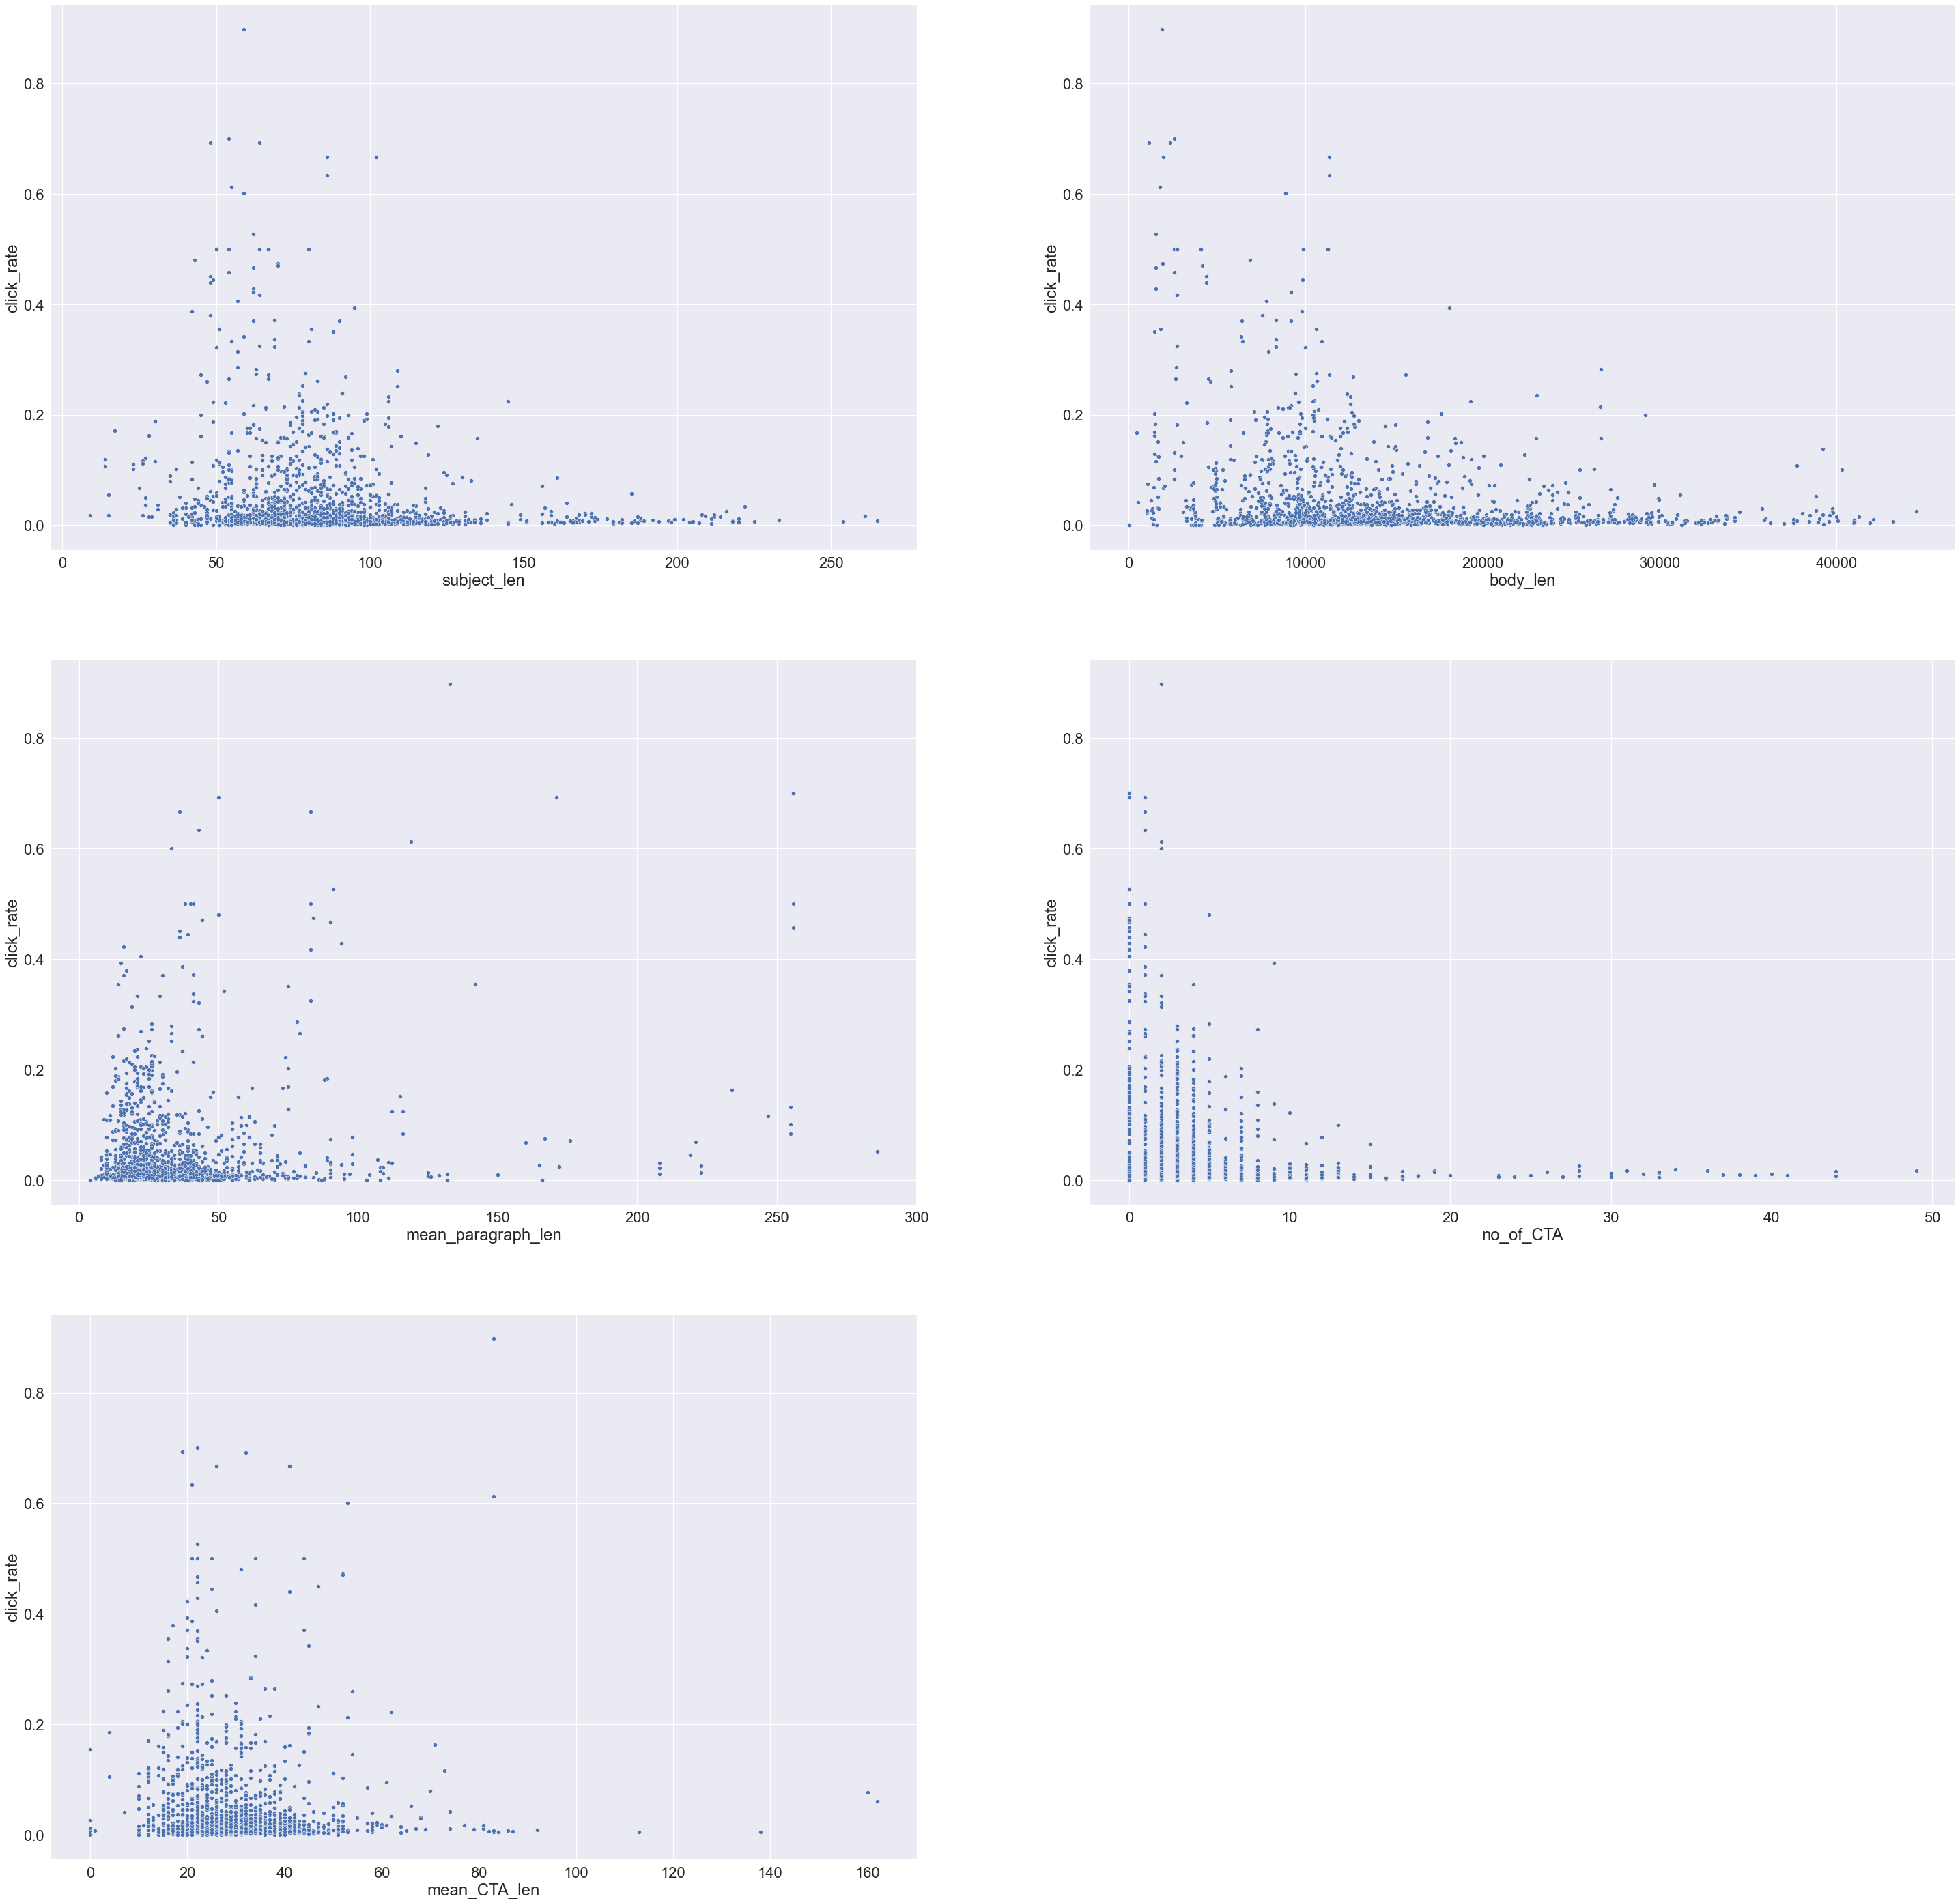

In [49]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(50,50))
for i in range(1, len(numerical_features)+1):
    ax = fig.add_subplot(3, 2, i)
    sns.scatterplot(data=df, x=numerical_features[i-1], y='click_rate')

#### Observations:

- subject_len: Higher values of CTR is achieved for emails havng subject len < 100. We have evidence supporting our hypothesis.
- body_len: Higher values of CTR is achieved at lower values of body_len (hypo is proved)
- mean_paragraph_len: Same trend as above
- mean_CTA_len: For mean_CTA_len=0, click_rate is very small, approximately zero. Intuitive 
- no_of_CTA: For cases of zero CTA, high values of CTR is achieved. This needs to be investigated. will be discussed afterwards.


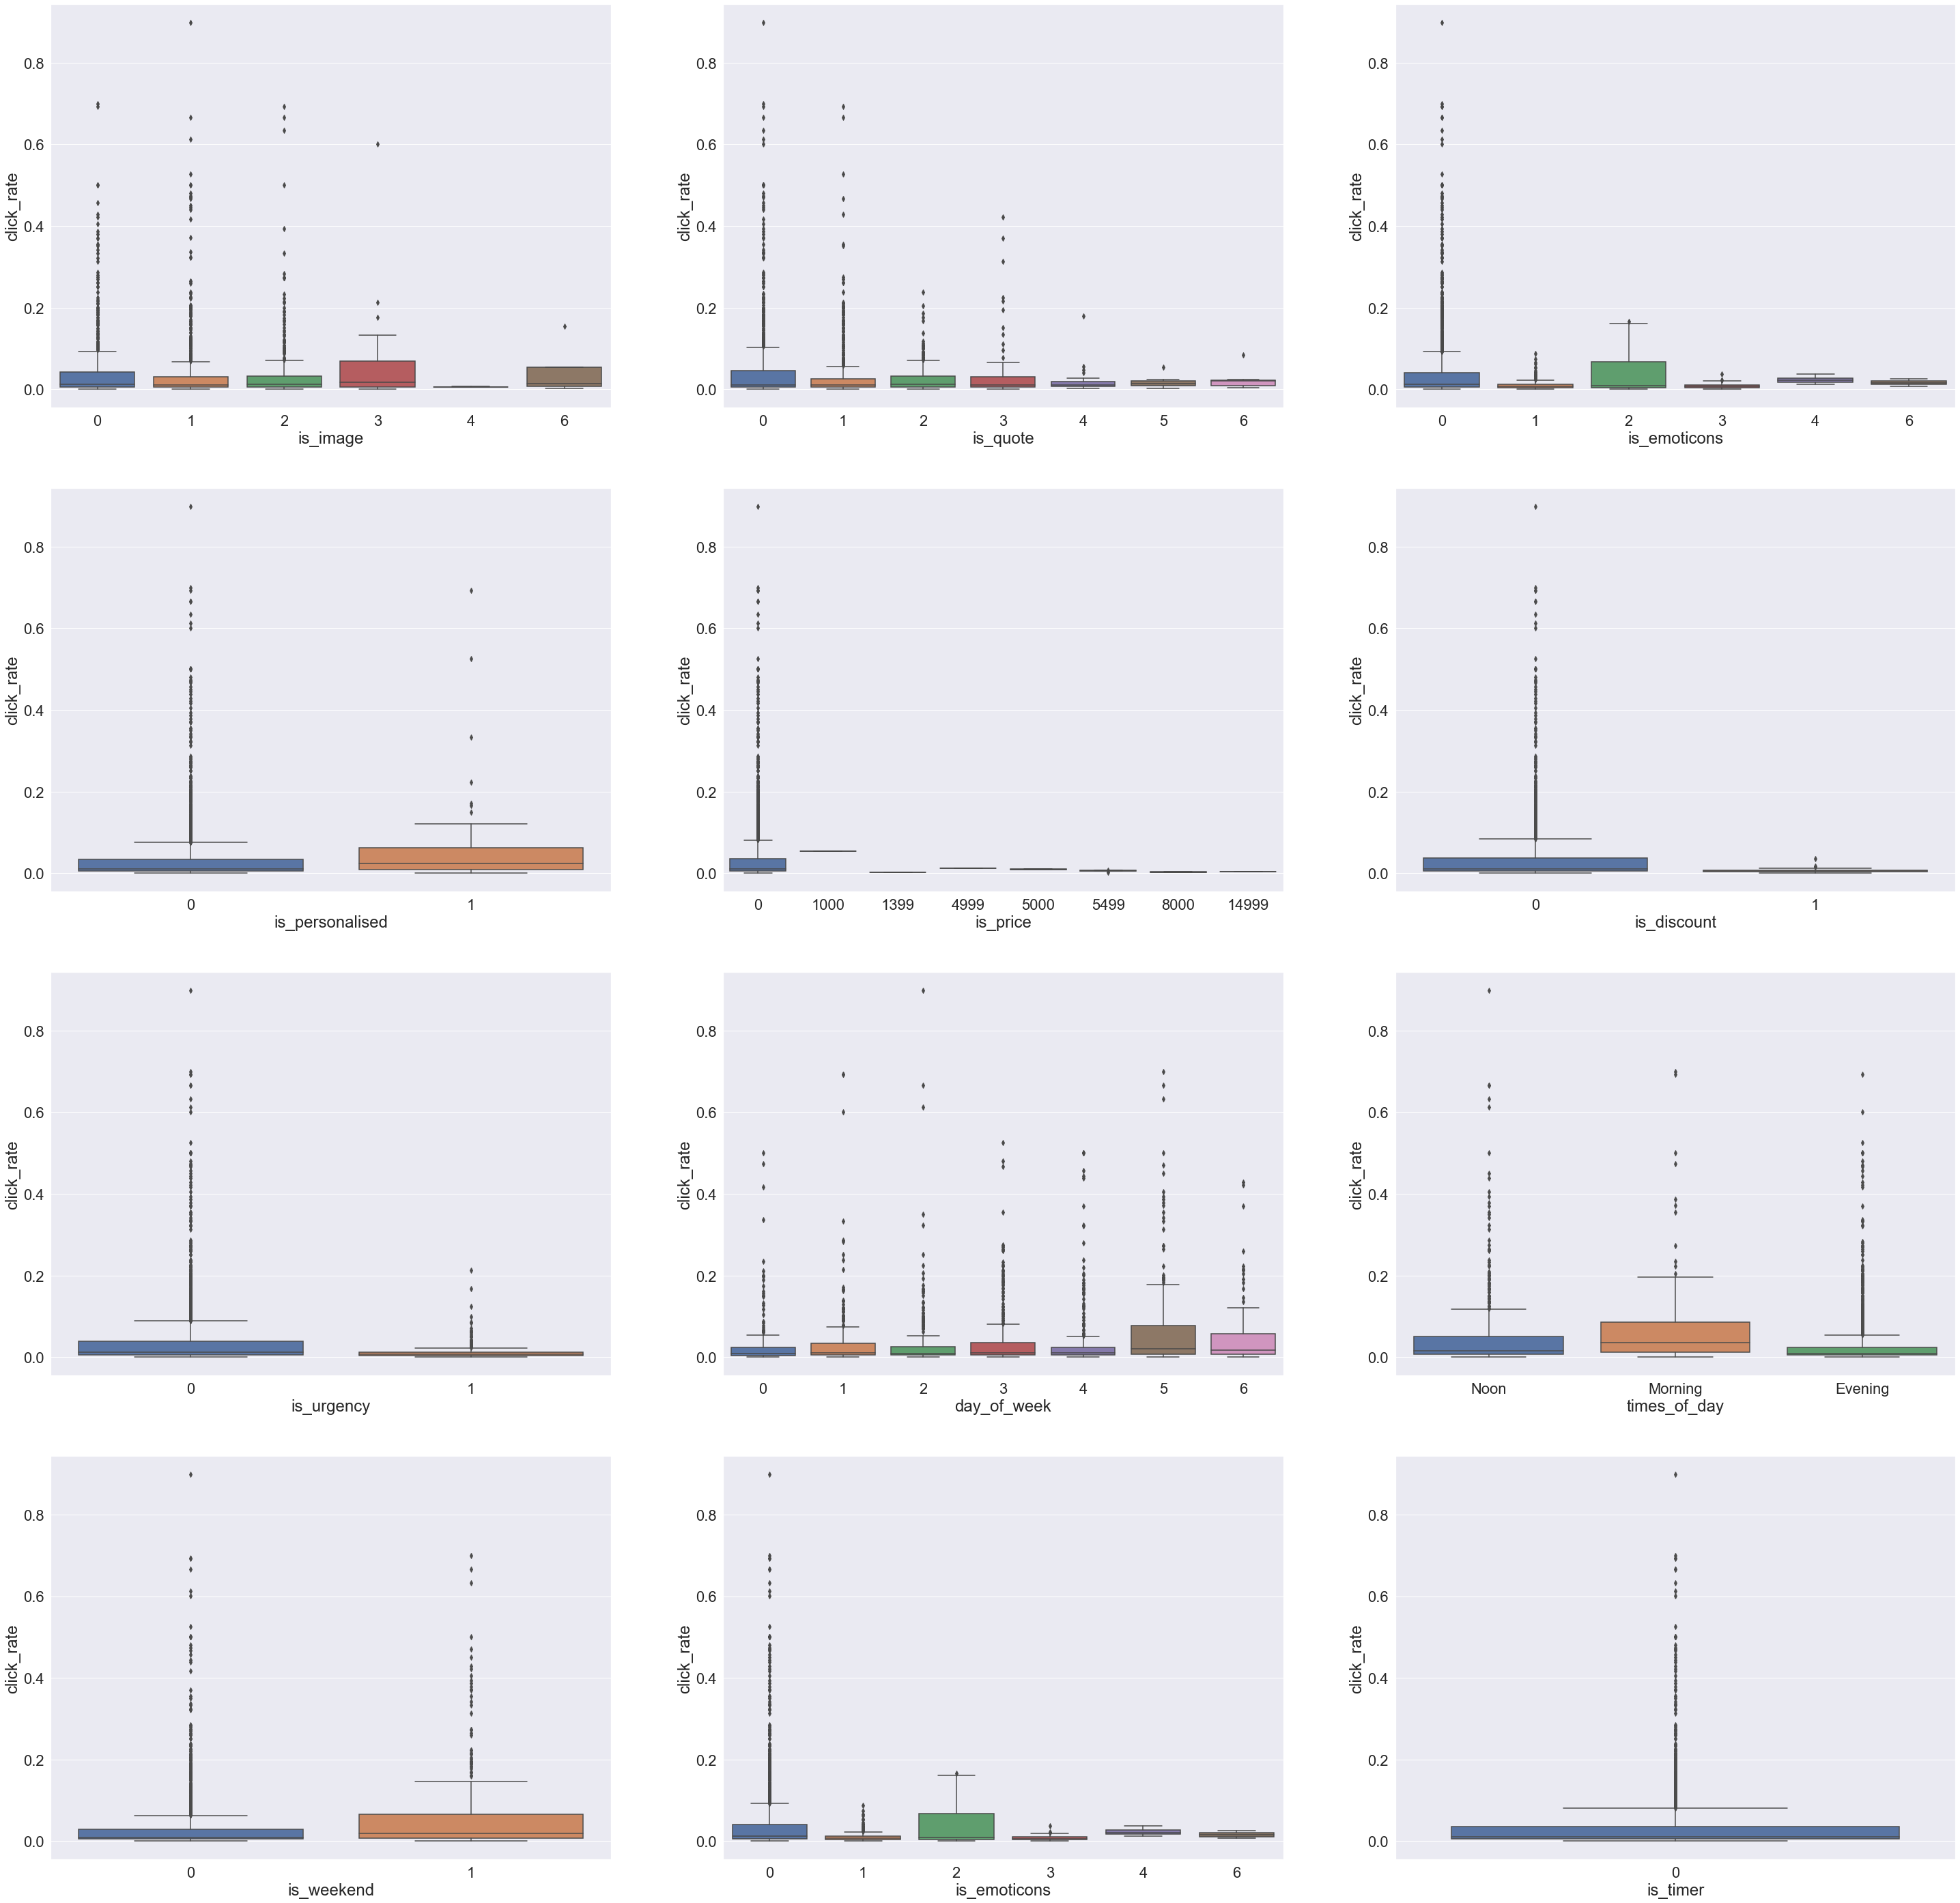

In [15]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(50,50))
for i in range(1, len(categorical_features)+1):
    ax = fig.add_subplot(4, 3, i)
    sns.boxplot(data=df, x=categorical_features[i-1], y='click_rate')

#### Observations:

- weekend: Higher CTR is achieved on weekends, which is intuitive and also supported by plot 8 (day_of_week vs click_rate). Here, days 5 and 6(saturdays and sundays) have higher CTR.
- is_discount: Strangely, when there is no discount, higher CTR is evidenced. 
- is_price: When there is no price mentioned in emails, higher CTR is achieved. as per hypo
- is_urgency: It is counterintuitive, emails with no urgency tags are having higher CTR but it is highly imbalanced class also. 
- is_personalised: Higher CTR is evidenced in cases where emails are personalised even though personalised emails are very small in number.


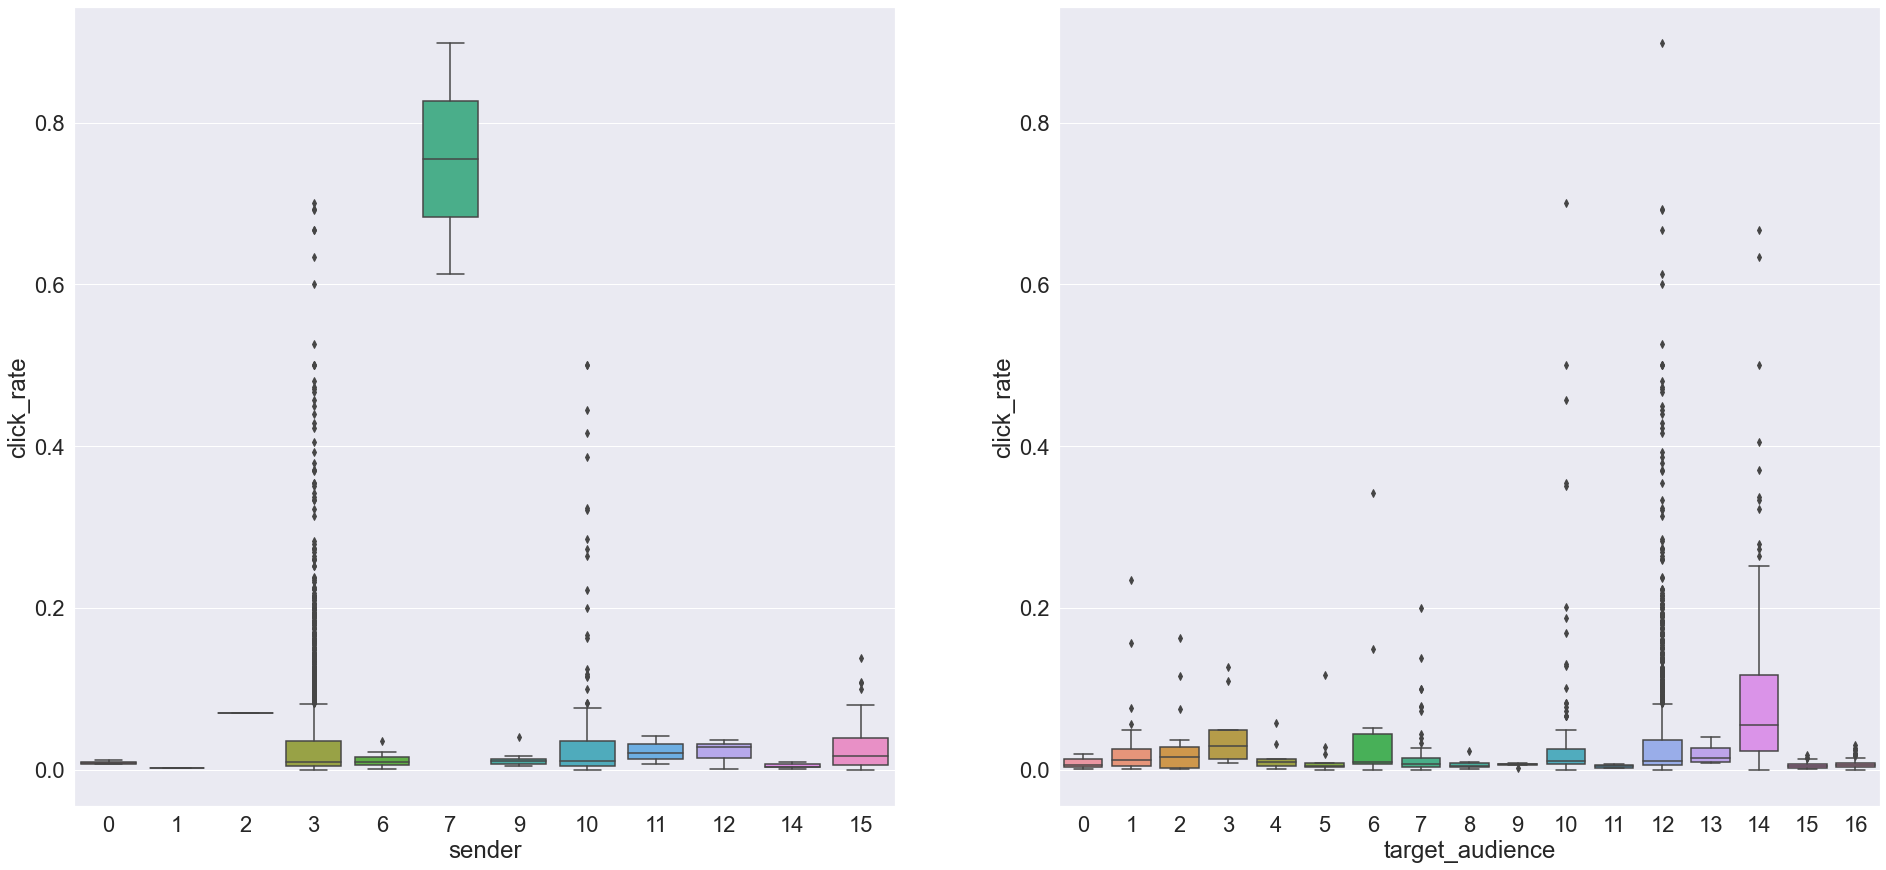

In [16]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(50,50))
for i in range(1, len(categorical_features2)+1):
    ax = fig.add_subplot(3, 3, i)
    sns.boxplot(data=df, x=categorical_features2[i-1], y='click_rate')

#### Observations:
    
- Sender: Sender 7 is clearly the most preferred sender as evidenced by the data. Even though the number of emails                   sent by sender 7 is very small, the highest CTR is achieved by sender 7. Sender 3 is also not very far behind but the most number ofemails were. sent by sender 3 only.

- target_audience: Clearly, audience no 14 and 12 are the most responsive audience. others such as 1,2,3,6,10 are also quite responsive.

        
        
        
        

In [17]:
df[numerical_features].corr()

,subject_len,body_len,mean_paragraph_len,no_of_CTA,mean_CTA_len
subject_len,1.000000,0.427326,-0.224770,0.400213,0.144261
body_len,0.427326,1.000000,-0.496146,0.559353,0.083468
mean_paragraph_len,-0.224770,-0.496146,1.000000,-0.170012,0.064632
no_of_CTA,0.400213,0.559353,-0.170012,1.000000,0.170387
mean_CTA_len,0.144261,0.083468,0.064632,0.170387,1.000000


<AxesSubplot:xlabel='category', ylabel='click_rate'>

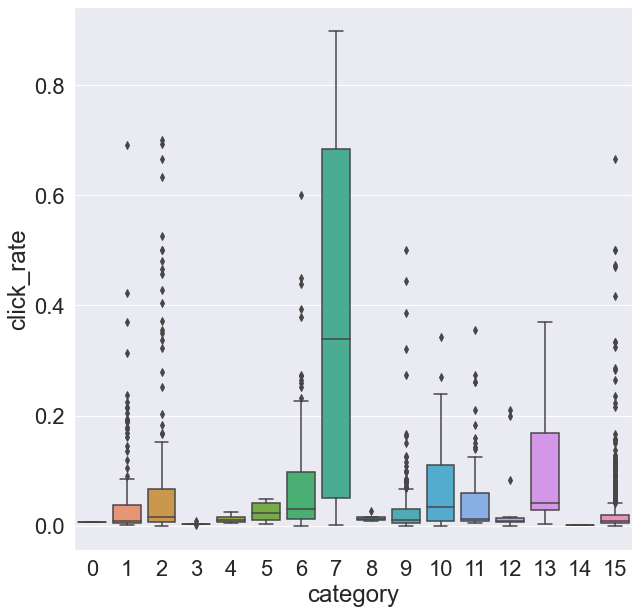

In [18]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(10,10))
sns.boxplot(data=df, x='category', y='click_rate')

<AxesSubplot:xlabel='product', ylabel='click_rate'>

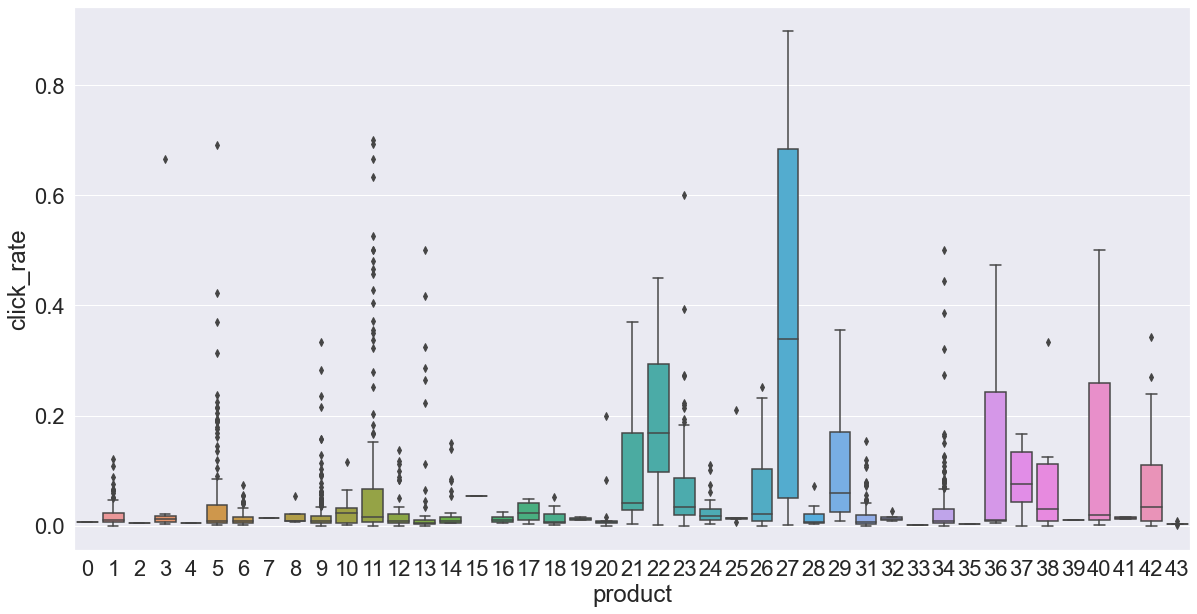

In [19]:
sns.set(font_scale=2)
fig = plt.figure(figsize=(20,10))
sns.boxplot(data=df, x='product', y='click_rate')

<AxesSubplot:>

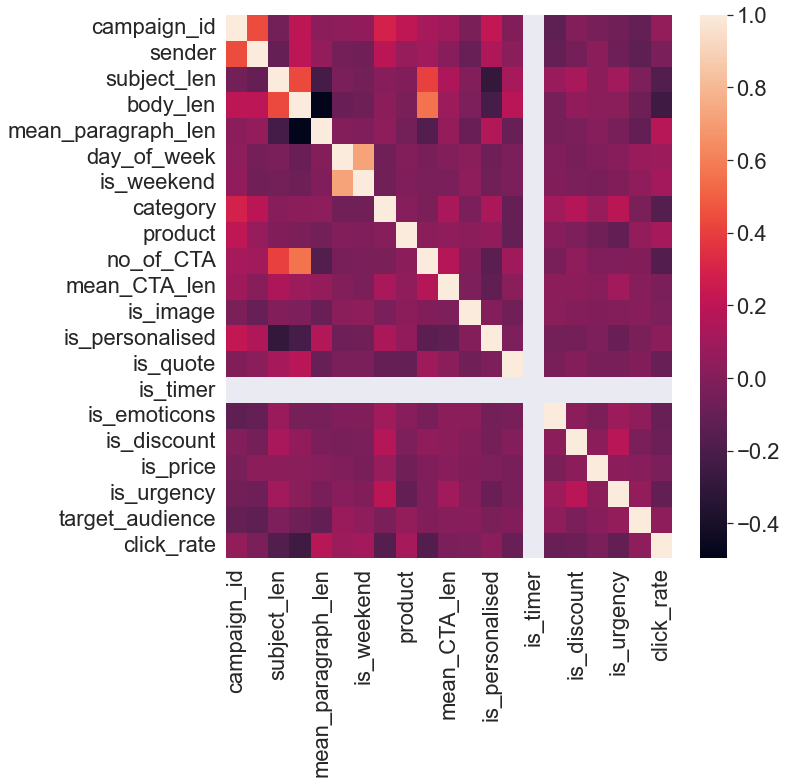

In [20]:
fig = plt.figure(figsize=(10,10))
sns.heatmap(df.corr())

#### Observations:

As evidenced by above subject_len has a fairly high correlation with body_len and no_of_CTA which is intuitive also.

## Base Model

- Creating a base model using Decision Tree Regressor

In [21]:
def transform1(data):
    data = data.drop(['campaign_id','is_timer','click_rate'], axis=1)
    data['is_price'] = data['is_price'].apply(lambda x: 0 if x==0 else 1)
    data = data.drop(['no_of_CTA','body_len'], axis=1)
    data = pd.concat([pd.get_dummies(data['times_of_day']).add_prefix('times_of_day_'), data.drop(['times_of_day'], axis=1)], axis=1)
    return data

In [22]:
y = df['click_rate']
x = transform1(df)

In [23]:
dtr = DecisionTreeRegressor()

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=42)

In [24]:
dtr.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, dtr.predict(train_x)))
print('Test error: ', r2_score(test_y, dtr.predict(test_x)))

Train error:  0.997273983872862
Test error:  -0.5766150504167495


### Data Preprocessing and Feature Generation

In [62]:
def custom_transform(data):
    data = data.drop(['campaign_id', 'is_timer'], axis=1)
    data['is_price'] = data['is_price'].apply(lambda x: 0 if x==0 else 1)
    #data = data.drop(['no_of_CTA','body_len'], axis=1)
    
    data['times_of_day_evening'] = (data['times_of_day'] == 'Evening')*1
    data['times_of_day_noon'] = (data['times_of_day'] == 'Noon')*1
    data['times_of_day_morning'] = (data['times_of_day'] == 'Morning')*1
    
    data['no_of_paragraph'] = data['body_len']/data['mean_paragraph_len']
    data['body_by_subject'] = data['body_len']/data['subject_len']
    data['CTA_len'] = data['no_of_CTA'] * data['mean_CTA_len']
    data['CTA_body_ratio'] = data['CTA_len']/data['body_len']
    data['no_CTA_per_para'] = data['no_of_CTA']/data['no_of_paragraph']
    data['mean_CTA_per_para'] = data['mean_CTA_len']/data['mean_paragraph_len']
    data['body_minus_CTA'] = data['body_len'] - data['CTA_len']
    
    data['images_per_para'] = data['is_image']/data['no_of_paragraph']
    data['quotes_per_para'] = data['is_quote']/data['no_of_paragraph']
    data['emos_per_para'] = data['is_emoticons']/data['no_of_paragraph']
    
    data['sender_target'] = data['sender'].astype(str) + '-' + data['target_audience'].astype(str)
    data['category_product'] = data['category'].astype(str) + '-' + data['product'].astype(str)
    
    #data['no_of_CTA'] = np.log(1 + data['no_of_CTA'])
    data['mean_paragraph_len'] = np.log(1+ data['mean_paragraph_len'])
    data['mean_CTA_len'] = np.log(1+ data['mean_CTA_len'])
    
    data = data.drop(['times_of_day','day_of_week','sender','target_audience','category','product'], axis=1)
    return data
    

In [63]:
y = df['click_rate']
x = df.drop(['click_rate'], axis=1)

train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.20, random_state=42)

train_x = custom_transform(train_x)
test_x = custom_transform(test_x)

### Encoding the categorical features using one hot encoder 

In [64]:
encode = ['sender_target','category_product']
train_encode = train_x[encode]

enc = OneHotEncoder(handle_unknown = 'ignore')

enc.fit(train_encode)
train_encode = enc.transform(train_encode).toarray()
train_encode = pd.DataFrame(train_encode)

test_encode = test_x[encode]
test_encode = enc.transform(test_encode).toarray()
test_encode = pd.DataFrame(test_encode)

train_x.reset_index(drop=True, inplace=True)
test_x.reset_index(drop=True, inplace=True)

train_x = pd.concat([train_encode, train_x.drop(encode, axis=1)], axis=1)
test_x = pd.concat([test_encode, test_x.drop(encode, axis=1)], axis=1)

In [57]:
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, dtr.predict(train_x)))
print('Test error: ', r2_score(test_y, dtr.predict(test_x)))

Train error:  0.9988298202222534
Test error:  -0.47434006803442896


### Random Forest Regressor

- Basic model with no hyperparameter tuning.

In [29]:
rfr = RandomForestRegressor(random_state=42)

rfr.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, rfr.predict(train_x)))
print('Test error: ', r2_score(test_y, rfr.predict(test_x)))

Train error:  0.9284767989584255
Test error:  0.4911911080786838


#### Hyperparameter tuning for Random Forest Regressor using RandomisedSearchCV

In [30]:
parameters = {
    'n_estimators': range(80,150,5),
    'max_depth': range(5,15),
    'min_samples_split': range(10,24,2),
    'min_samples_leaf': range(5,12),
    'max_features': [0.3, 0.4, 0.5, 0.6, 0.7]
}
random_search = RandomizedSearchCV(estimator=rfr, param_distributions=parameters, n_iter=10,
                                   random_state=42, scoring=r2_score, cv=4)

In [31]:
random_search.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, random_search.predict(train_x)))
print('Test error: ', r2_score(test_y, random_search.predict(test_x)))

Train error:  0.6627597689426787
Test error:  0.4735731640418226


In [32]:
random_search.best_params_

{'n_estimators': 95,
 'min_samples_split': 12,
 'min_samples_leaf': 5,
 'max_features': 0.6,
 'max_depth': 9}

In [33]:
rfr = RandomForestRegressor(n_estimators=95,min_samples_split=12 ,min_samples_leaf= 5, max_features= 0.6,
                            max_depth= 9, random_state=42)

rfr.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, rfr.predict(train_x)))
print('Test error: ', r2_score(test_y, rfr.predict(test_x)))

Train error:  0.6627597689426787
Test error:  0.4735731640418226


### XGBoost Regressor

- Basic xgboost with no hyperparameter tuning

In [58]:
xgb = XGBRegressor(random_state=42)
xgb.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, xgb.predict(train_x)))
print('Test error: ', r2_score(test_y, xgb.predict(test_x)))

Train error:  0.9933078665901286
Test error:  0.4927260496125323


#### Hyperparameter tuning for XGBoost Regressor using RandomisedSearchCV

In [38]:
parameters = {
    'max_depth': range(2,5),
    'subsample': np.arange(0.3,1,0.1),
    'n_estimators': range(50,70,5),
    'learning_rate': np.arange(0.1,0.2,0.01)   
}
xgb = XGBRegressor()
random_xgb = RandomizedSearchCV(estimator=xgb, param_distributions=parameters, random_state=42, n_iter=20,
                                   scoring=r2_score, cv=4)

random_xgb.fit(train_x, train_y)
print('Train error: ', r2_score(train_y, random_xgb.predict(train_x)))
print('Test error: ', r2_score(test_y, random_xgb.predict(test_x)))

Train error:  0.6410260699640408
Test error:  0.46246930394141317


In [41]:
random_xgb.best_params_

{'subsample': 0.5,
 'n_estimators': 65,
 'max_depth': 2,
 'learning_rate': 0.17999999999999997}

In [61]:
xgb = XGBRegressor(n_estimators=65, max_depth=2, learning_rate=0.18, subsample=0.5)

xgb.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, xgb.predict(train_x)))
print('Test error: ', r2_score(test_y, xgb.predict(test_x)))

Train error:  0.6410260699640408
Test error:  0.46246930394141317


In [66]:
xgb = XGBRegressor(n_estimators=60, max_depth=3, learning_rate=0.12, subsample=0.7)

xgb.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, xgb.predict(train_x)))
print('Test error: ', r2_score(test_y, xgb.predict(test_x)))

Train error:  0.7187518451623547
Test error:  0.5534082944185352


- Manually adding more hyperparameters to improve the model performance

In [65]:
xgb2 = XGBRegressor(n_estimators=60, max_depth=3, learning_rate=0.12, subsample=0.7,
                   colsample_bylevel=1.0, colsample_bytree=0.6)

xgb2.fit(train_x, train_y)

print('Train error: ', r2_score(train_y, xgb2.predict(train_x)))
print('Test error: ', r2_score(test_y, xgb2.predict(test_x)))

Train error:  0.7229511624891114
Test error:  0.5133644927743501


## Final prediction using best-trained model and exporting the output

Importing the test data on which predictions are required to be done and submitted.

- After doing all the pre-processing, we will take predictions against the test data from our best trained model.


In [44]:
test_data = pd.read_csv('test_Bk2wfZ3.csv')
id_value = test_data['campaign_id']

test_data = custom_transform(test_data)

test_data_encode = test_data[encode]
test_data_encode = enc.transform(test_data_encode).toarray()
test_data_encode = pd.DataFrame(test_data_encode)

test_data = pd.concat([test_data_encode, test_data.drop(encode, axis=1)], axis=1)

test_pred = xgb.predict(test_data)
test_pred = pd.Series(test_pred)
final = pd.concat([id_value, test_pred], names=['campaign_id', 'click_rate'], axis=1)
final.columns = ['campaign_id', 'click_rate']
final = final.set_index('campaign_id')
final.to_csv('xgb_final.csv')